In [ ]:
# Import tensorflow for AI, and some other important libraries: numpy, and matplotplyb
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the Numbers dataset available on keras
(train1, train2), (test1, test2) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

#("train1 shape:", train1.shape, "train2 shape:", train2.shape)

train1 = train1 / 255
import seaborn as sns
from tensorflow.python.framework import ops

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import keras
keras.__version__

'2.5.0'

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

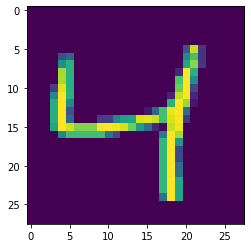

In [ ]:
print(train1[1]) #inside train2 is the label for the image, which is just 4
#
plt.imshow(train1[2])


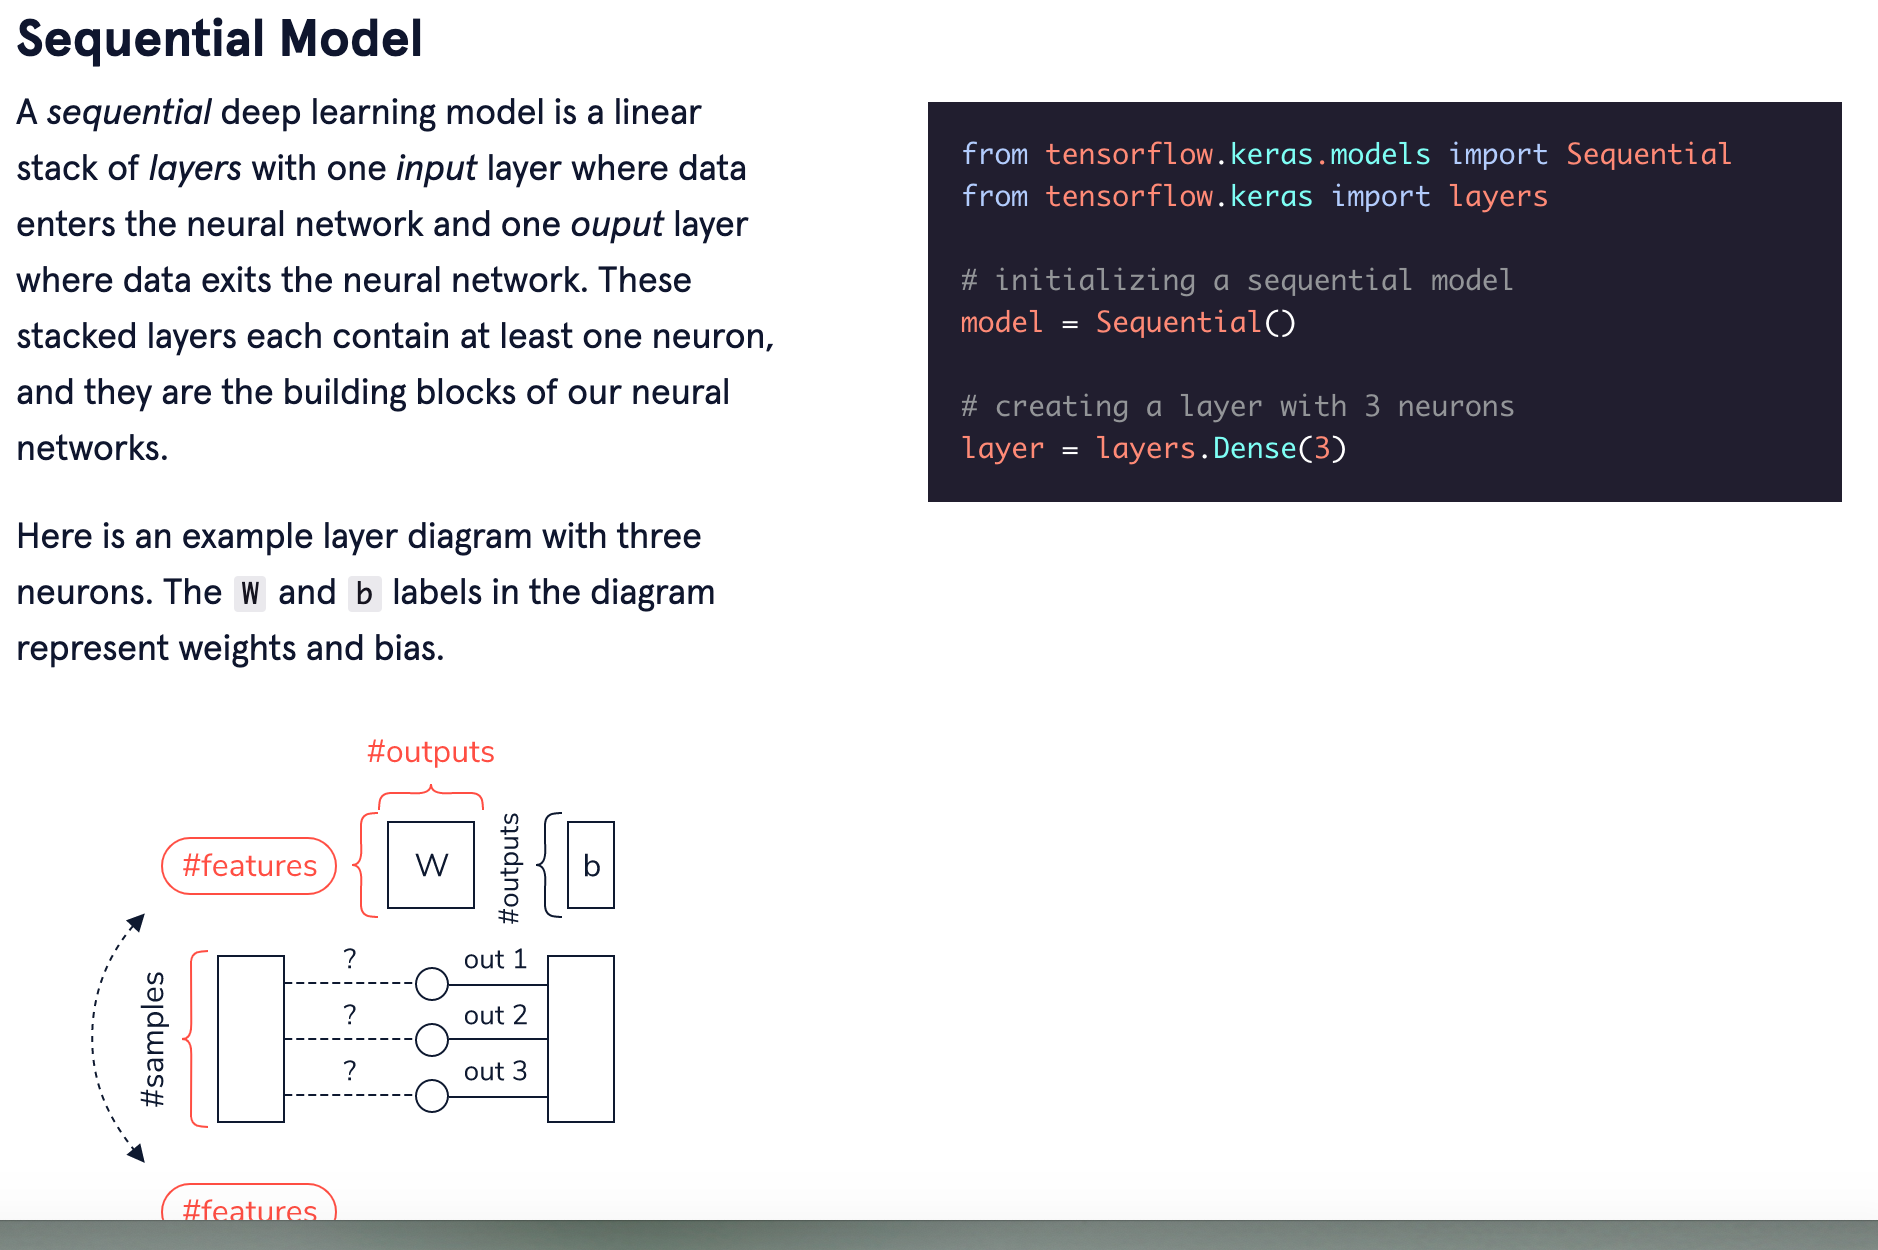

In [ ]:
#with this dataset, I will demonstrate a sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = tf.keras.models.Sequential()


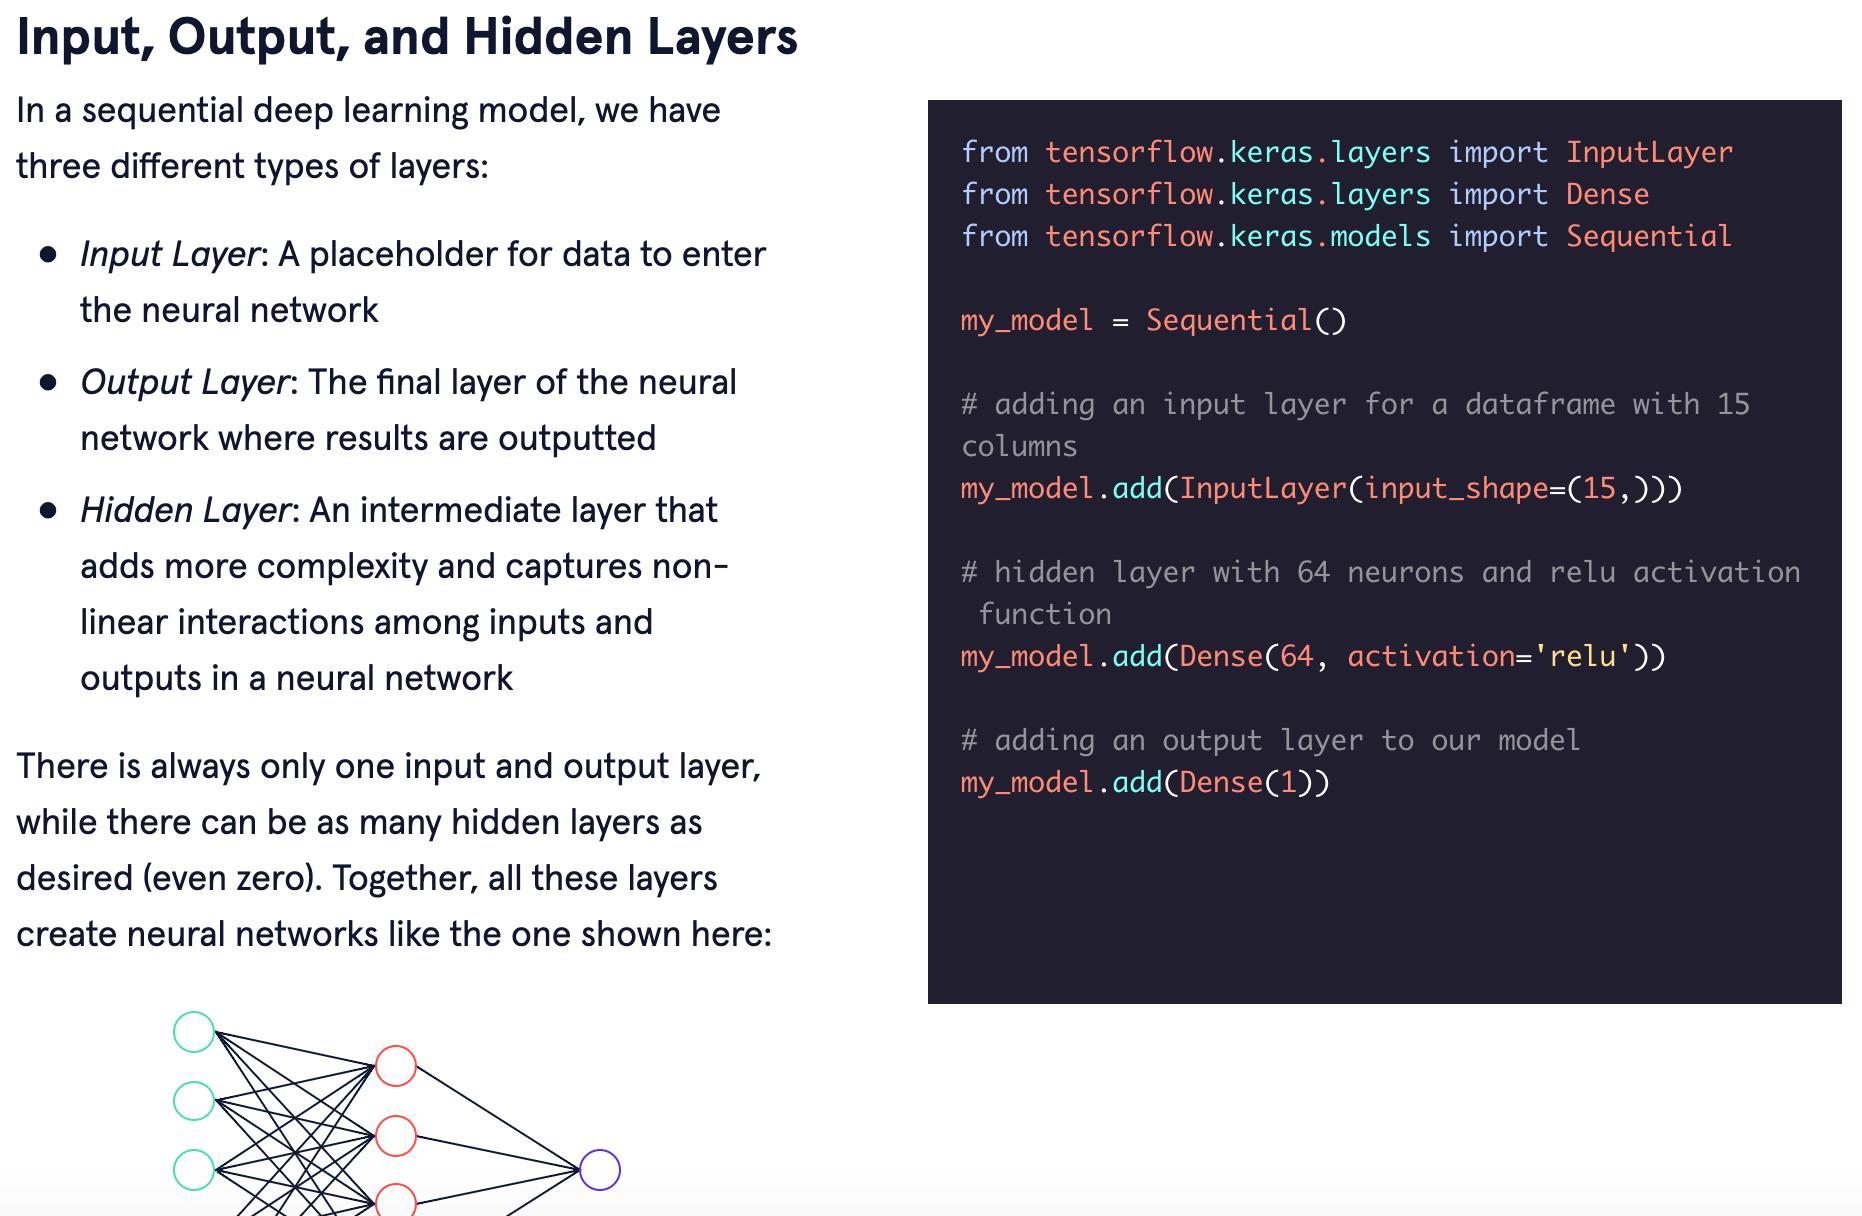

In [ ]:
#we need to add Input, Output and Hidden Layers for out model
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
#the images are 28x28 pixels wide, therefore out input shape will be (28, 28, 3)
#model.add(tf.keras.Input(shape=(28, 28, 3)))
#As the images are really simple, Conv2D layers and Maxpooling
#layers aren't even necessary for the model to work. one input, one hidden, and one output
#layer is enough to give us a high accuracy

#input layer
model.add(Flatten())

#trying out 64 nuerons for model like in example for hidden layer
model.add(Dense(64, activation='relu'))

#10 outputs for out model, digits 0-9
model.add(Dense(10))



In [ ]:
# Adam as the optimizer -- a widely used one
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=opt)

In [ ]:
# fiting our model
model.fit(train1, train2, epochs=4, batch_size=3, verbose=1)
 

# evaluating our model
val_mse, val_mae = model.evaluate(test1, test2, verbose = 0)



Epoch 1/4
20000/20000 [==============================] - 35s 2ms/step - loss: 12.3032 - accuracy: 0.1022
Epoch 2/4
20000/20000 [==============================] - 35s 2ms/step - loss: 12.3033 - accuracy: 0.1022
Epoch 3/4
20000/20000 [==============================] - 37s 2ms/step - loss: 12.3032 - accuracy: 0.1022
Epoch 4/4
20000/20000 [==============================] - 38s 2ms/step - loss: 12.3032 - accuracy: 0.1022


##THIS HAD LOW ACCURACY, AS OUR MODEL DIDN"T HAVE ENOUGH HIDDEN LAYERS. MORE HIDEN LAYERS ARE REQUIRED FOR THE MODEL TO HAVE A HIGH ACCURACY

In [ ]:
#to try to improve the low accuracy, we should modify the daya
#train1 = train1 / 255
#note I'm moving this data motification to the beginnning. Repeatatelty running it will make every pixel value nearly 0 and the model wont work.

model2 = tf.keras.models.Sequential()

#input layer
model2.add(Flatten())

# hidden layes
model2.add(Dense(128, activation='relu'))
#trying out 128 nuerons for models for hidden layers
model2.add(Dense(128, activation='relu'))

model2.add(Dense(128, activation='relu'))


#10 outputs for out model, digits 0-9
model2.add(Dense(10, activation='softmax'))

# Adam as the optimizer, as done on the codecademy course
opt2 = keras.optimizers.Adam(learning_rate=0.01)

#compiling this model
model2.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=opt2)

# fiting our model
model2.fit(train1, train2, epochs=4, batch_size=30, verbose=1)
 

# evaluating our model, for accuracy
val_mse, val_mae = model2.evaluate(test1, test2, verbose = 0)



Epoch 1/4
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4470 - accuracy: 0.8686
Epoch 2/4
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2232 - accuracy: 0.9428
Epoch 3/4
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1954 - accuracy: 0.9508
Epoch 4/4
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1667 - accuracy: 0.9585


#95% + accuracy. I noticed that the main reason my model didn't work it because I didn't use the 'softmax' activation for the final output layer. The softmax activation Is critical to use for the output layer

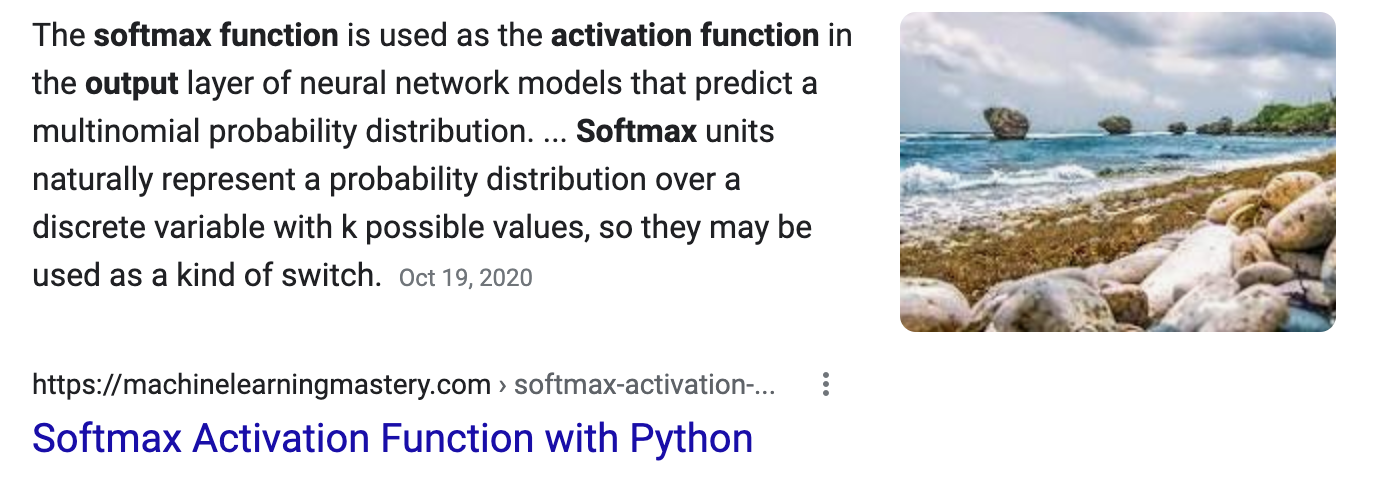

####Cifar10 Dataset Machine Learning (more complex images)

In [ ]:
# I'll make a neural network for this dataset as well. It contains images of
#https://keras.io/api/datasets/cifar10/
#0 = airplane
#1 = automobile
#2 = bird
#3 = cat
#4 = deer
#5 = dog
#6 = frog
#7 = horse
#8 = ship
#9 = truck
(train_a, train_b), (test_a, test_b) = tf.keras.datasets.cifar10.load_data()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 1 0 0 0]


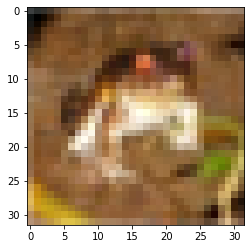

In [ ]:
print(train_b[0])
plt.imshow(train_a[0])

#this is a picture of a frog

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 0 0 0 1]


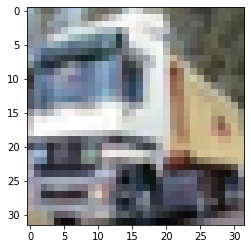

In [ ]:
print(train_b[1])
plt.imshow(train_a[1])

#this is a picture of a truck

[0 0 0 0 1 0 0 0 0 0]


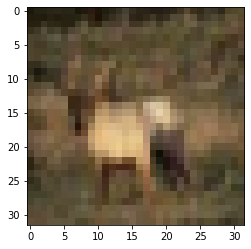

In [ ]:
print(train_b[3])
plt.imshow(train_a[3])

#this is a picture of a deer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 0 0 0 0 0 0 0 0]


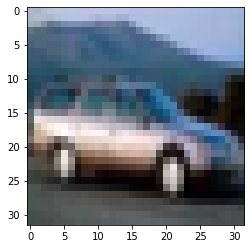

In [ ]:
print(train_b[4])
plt.imshow(train_a[4])

#this is a picture of an automobile

[0 0 1 0 0 0 0 0 0 0]


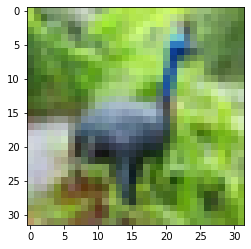

In [ ]:
print(train_b[6])
plt.imshow(train_a[6])

#this is a picture of a bird

[0 0 0 0 0 0 0 1 0 0]


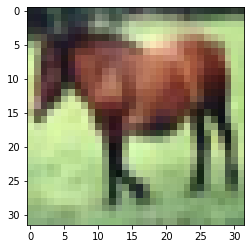

In [ ]:
print(train_b[7])
plt.imshow(train_a[7])

#this is a picture of a horse

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 0 0 1 0]


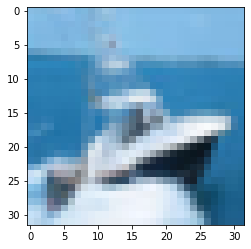

In [ ]:
print(train_b[8])
plt.imshow(train_a[8])

#this is a picture of a boat

[0 0 0 1 0 0 0 0 0 0]


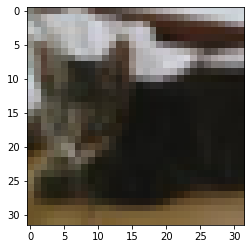

In [ ]:
print(train_b[9])
plt.imshow(train_a[9])

#this is a picture of a cat

[0 0 0 0 0 1 0 0 0 0]


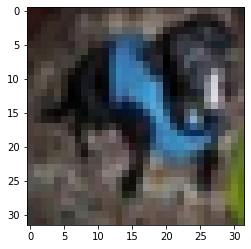

In [ ]:
print(train_b[27])
plt.imshow(train_a[27])

#this is a picture of a dog

In [ ]:
train_a = train_a / 250
test_a = test_a / 250

#We Will See if the Model we made for the number dataset will work for these images too (we will train the model on this new dataset)

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
#trying out 128 nuerons for models for hidden layers
model3.add(Dense(128, activation='relu'))

model3.add(Dense(128, activation='relu'))
#10 outputs for out model, digits 0-9
model3.add(Dense(10, activation='softmax'))

# Adam as the optimizer -- a widely used one
opt2 = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=opt2)

# fiting our model
model3.fit(train_a, train_b, epochs=4, batch_size=30, verbose=1)
 

# evaluating our model
val_mse, val_mae = model3.evaluate(test_a, test_b, verbose = 0)

Epoch 1/4
1667/1667 [==============================] - 10s 6ms/step - loss: 2.5759 - accuracy: 0.0998
Epoch 2/4
1667/1667 [==============================] - 10s 6ms/step - loss: 2.3038 - accuracy: 0.0994
Epoch 3/4
1667/1667 [==============================] - 9s 5ms/step - loss: 2.3034 - accuracy: 0.1013
Epoch 4/4
1667/1667 [==============================] - 9s 5ms/step - loss: 2.3040 - accuracy: 0.0992


##Our old model doesn't work its magic like before, as these images are a lot more complex. In order to increase our sucess rate from the low 27% it is right now, we should integrate conv2d or maxpooling layers, which are good for analuzing images. This is because Conv2D kernels are meant for detecting patterns between pixels next to each other, which is critical for complex image recognition. However, just to make sure that the low number of epochs wasnt the reason our old simple model failed, we can try increasing the epochs to see if the accuracy will increase

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
#trying out 128 nuerons for models for hidden layers
model3.add(Dense(128, activation='relu'))

model3.add(Dense(128, activation='relu'))
#10 outputs for out model, digits 0-9
model3.add(Dense(10, activation='softmax'))

# Adam as the optimizer -- a widely used one
opt2 = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=opt2)

# fiting our model
model3.fit(train_a, train_b, epochs=10, batch_size=30, verbose=1)
 

# evaluating our model
val_mse, val_mae = model3.evaluate(test_a, test_b, verbose = 0)

Epoch 1/10
1667/1667 [==============================] - 10s 6ms/step - loss: 2.3907 - accuracy: 0.1940
Epoch 2/10
1667/1667 [==============================] - 10s 6ms/step - loss: 1.9650 - accuracy: 0.2490
Epoch 3/10
1667/1667 [==============================] - 9s 6ms/step - loss: 1.9621 - accuracy: 0.2490
Epoch 4/10
1667/1667 [==============================] - 9s 6ms/step - loss: 1.9566 - accuracy: 0.2491
Epoch 5/10
1667/1667 [==============================] - 9s 5ms/step - loss: 1.9468 - accuracy: 0.2551
Epoch 6/10
1667/1667 [==============================] - 10s 6ms/step - loss: 1.9468 - accuracy: 0.2489
Epoch 7/10
1667/1667 [==============================] - 11s 6ms/step - loss: 1.9367 - accuracy: 0.2602
Epoch 8/10
1667/1667 [==============================] - 10s 6ms/step - loss: 1.9439 - accuracy: 0.2514
Epoch 9/10
1667/1667 [==============================] - 9s 6ms/step - loss: 1.9498 - accuracy: 0.2536
Epoch 10/10
1667/1667 [==============================] - 11s 7ms/step - loss:

## this model seems to be capped at aroundd 27% accuracy for the data, even with more epochs. A new model will be needed

## to start, we must hot encode the labels

In [ ]:
from keras.utils import to_categorical
#hot encoding the labels
train_b = to_categorical(train_b, dtype ="uint8")
test_b = to_categorical(test_b, dtype ="uint8")

#Complex Image Model


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

complex_image_model = Sequential()

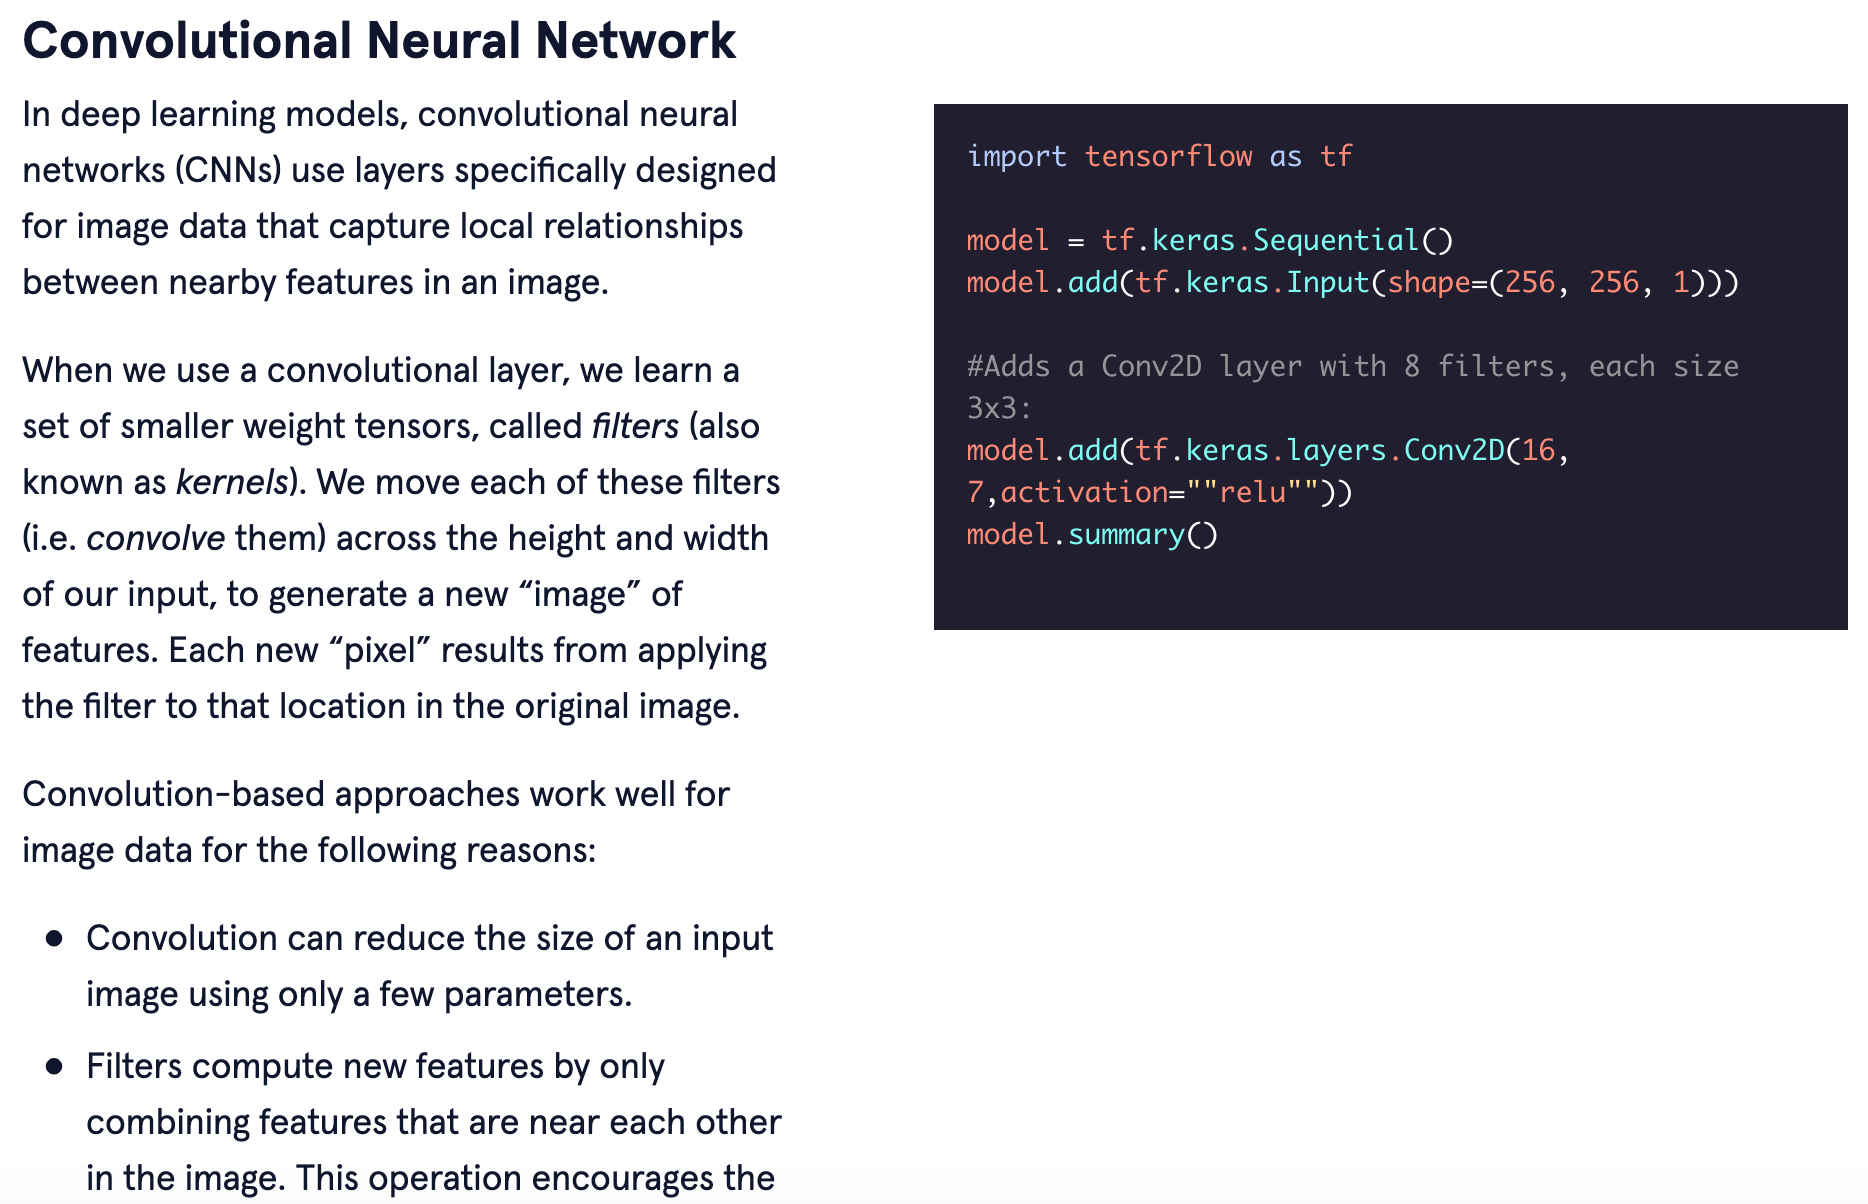

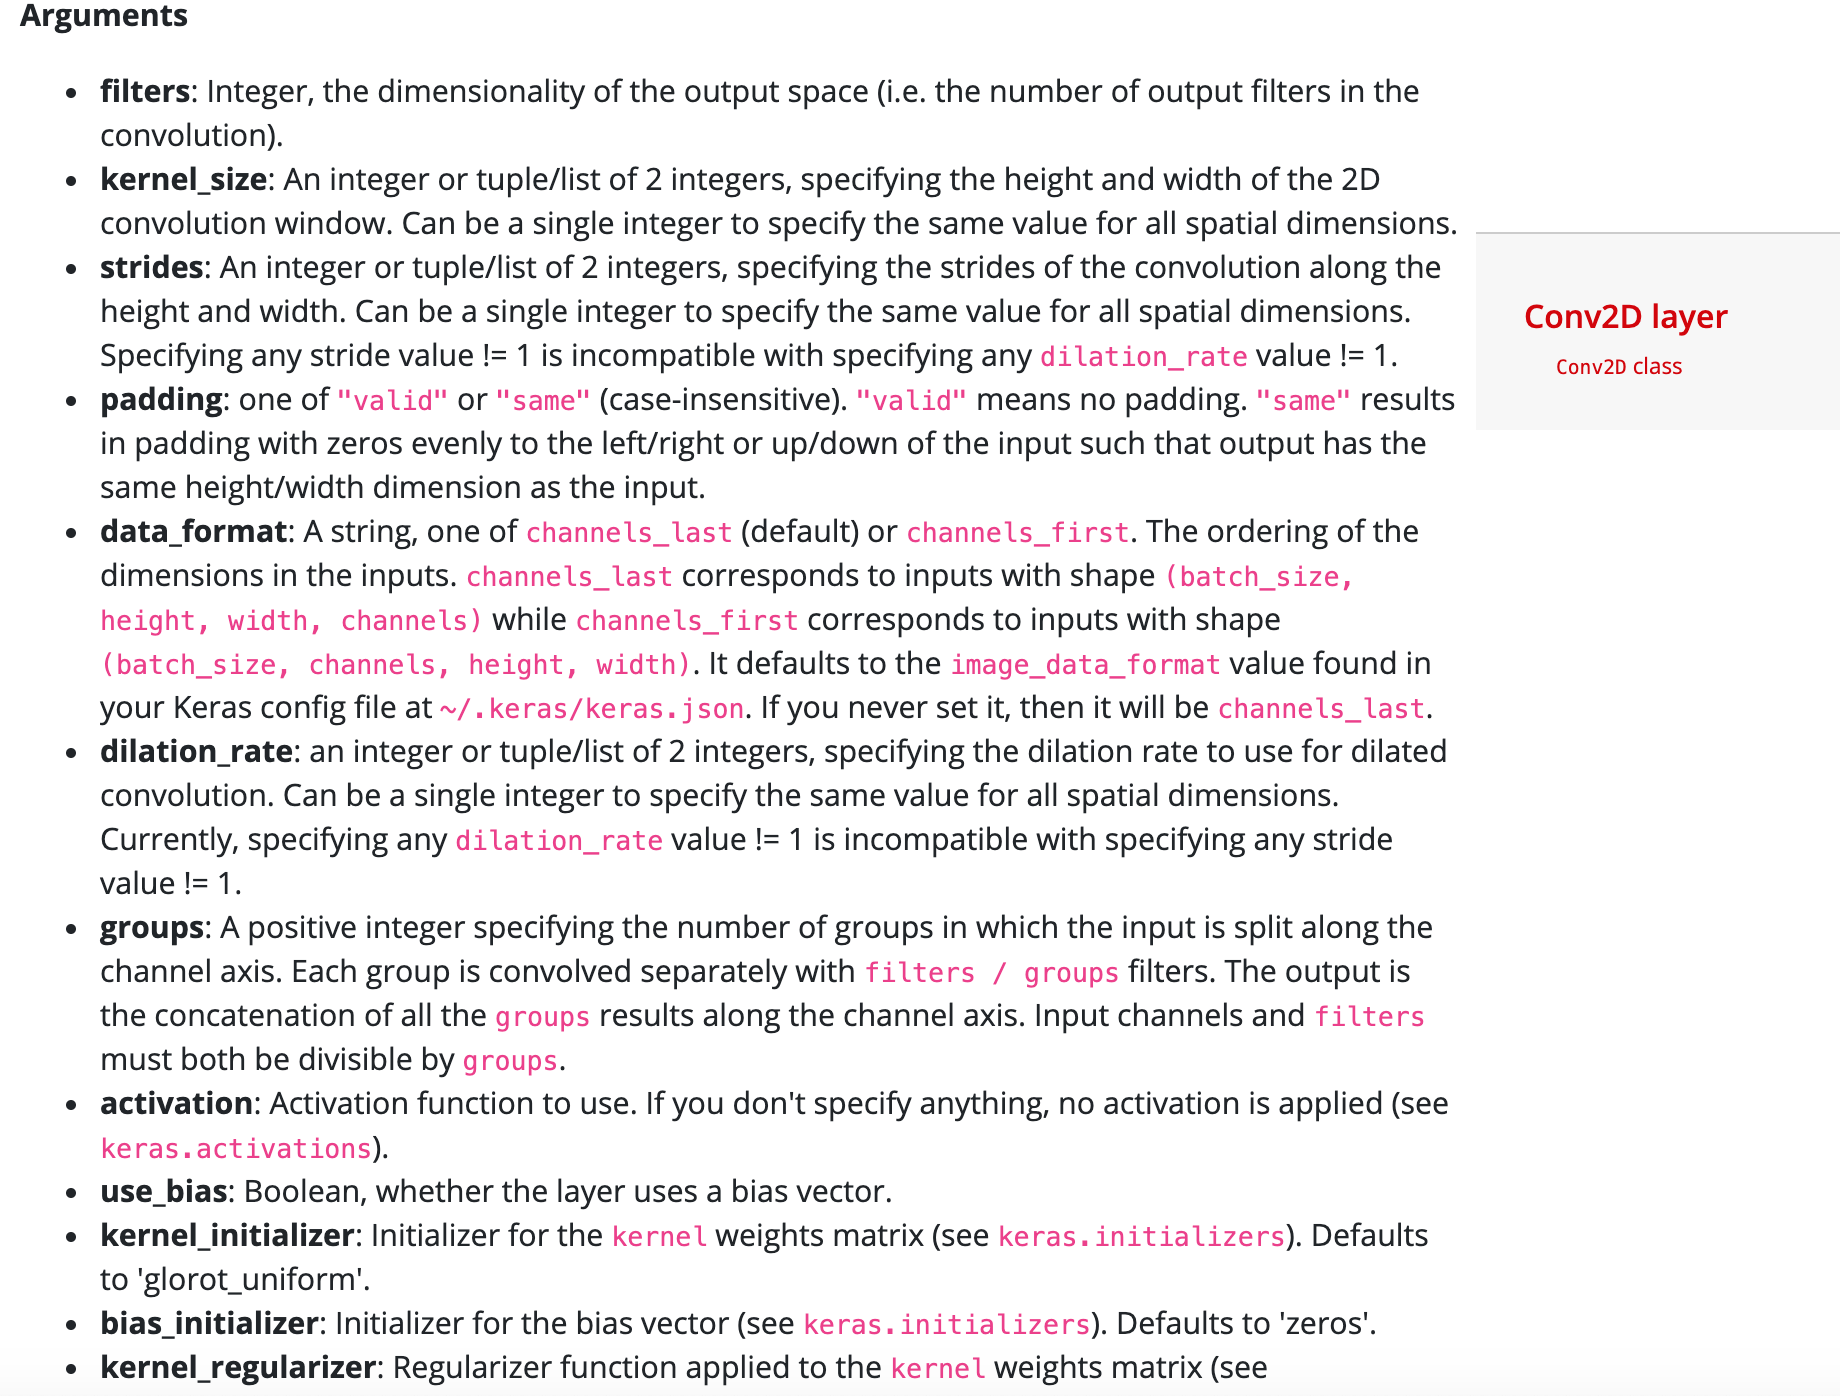

## here, we add two Conv2D layers to our model. The parameters are set for 64 3x3 kernals for each conv2D layer. the input shape is (32,32,3) as the dimentions of the imags are 32x32

In [ ]:
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation="relu", input_shape = (32,32,3), padding = 'same'))
#we no longer need input_shape, as that is only for the input conv2D layer
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))

#the only natural thing after conv2D layer is maxpooling layer

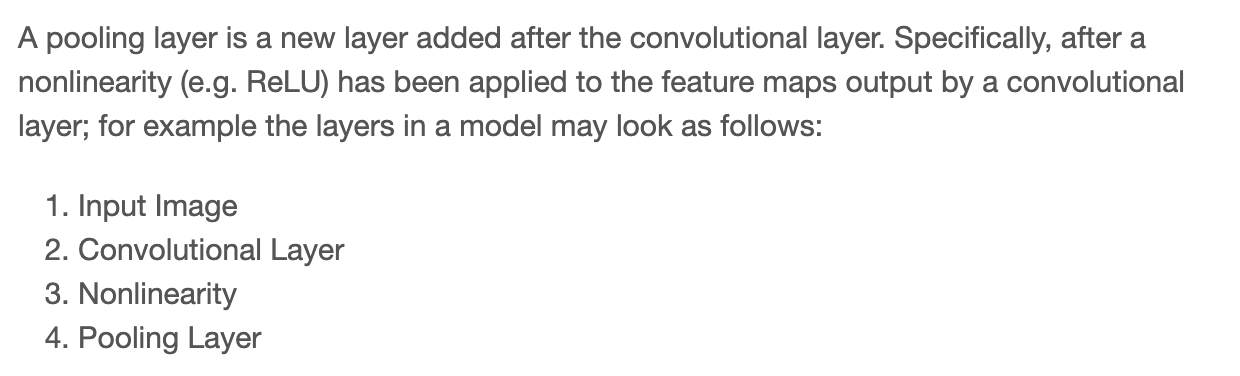

In [ ]:
complex_image_model.add(MaxPooling2D(pool_size=(2,2)))
#default 2x2 maxpooling

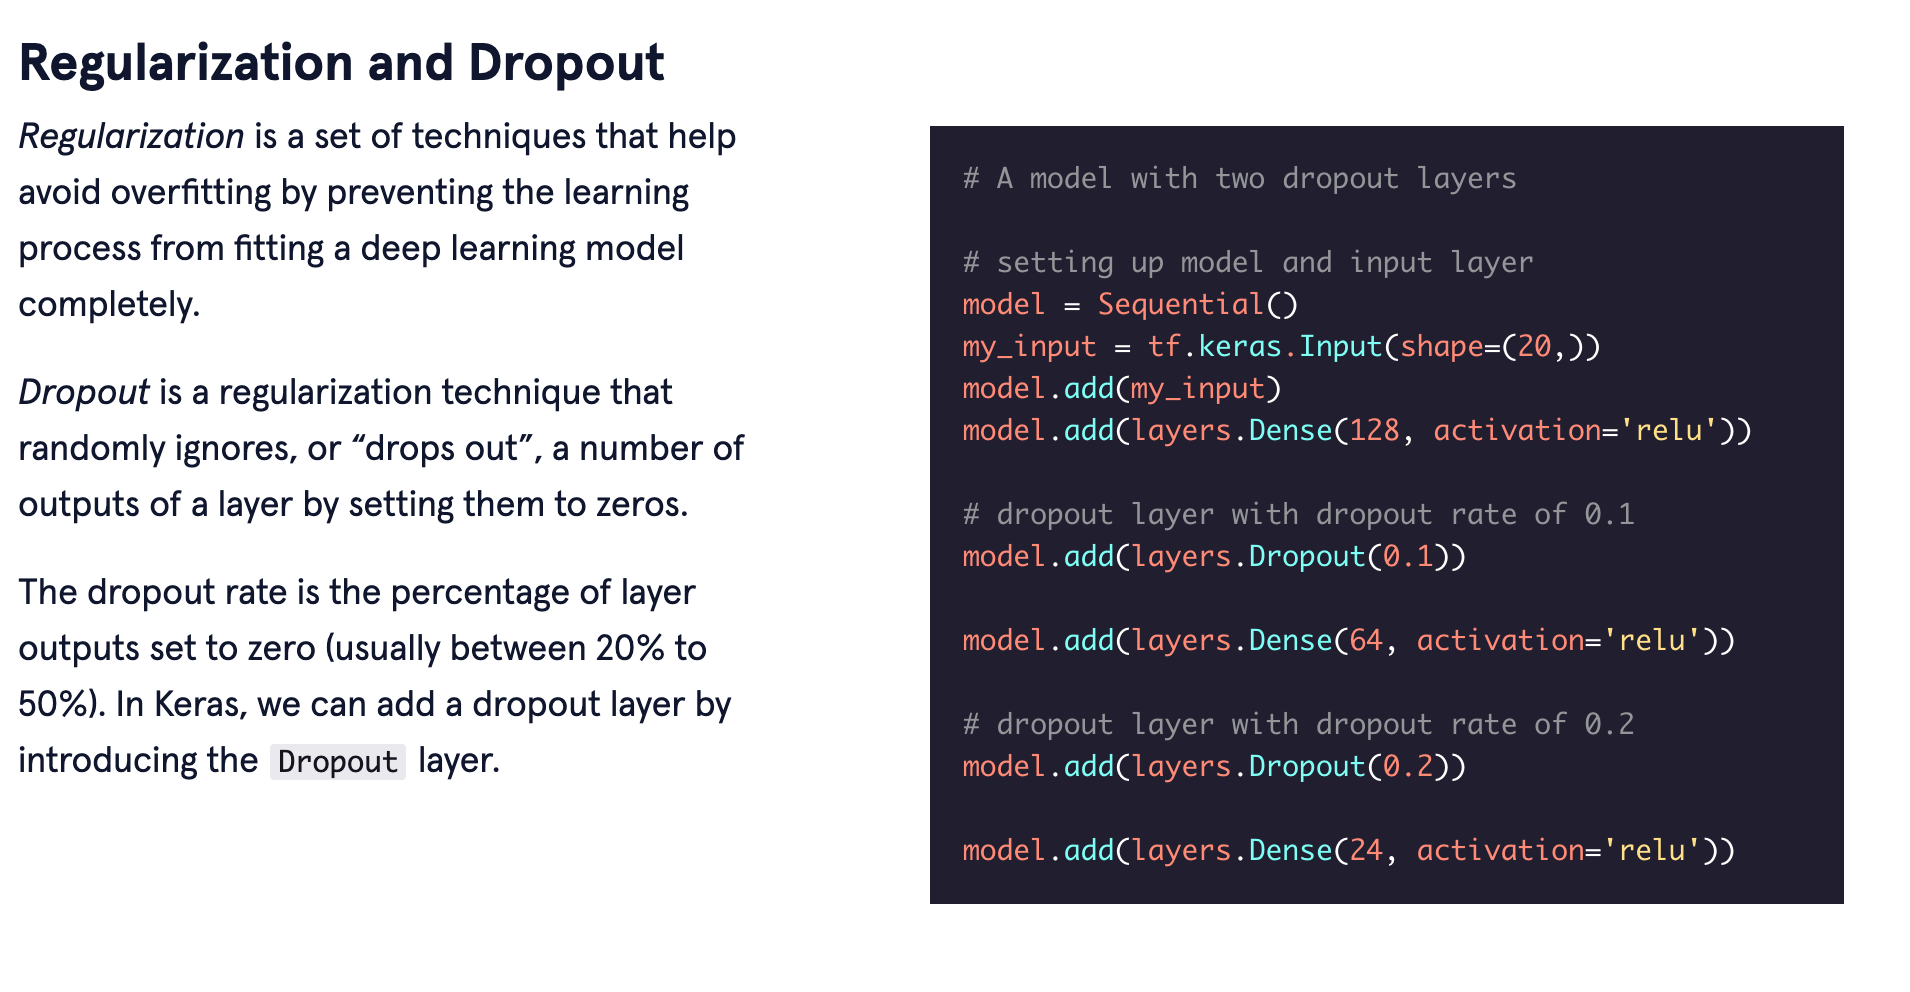

In [ ]:
#prevent overfitting
complex_image_model.add(layers.Dropout(0.2))

In [ ]:
#now, we can just rinse and repeat to make a thourough model, multiple Conv2D and Maxpooling layers are needed for depth,
# and for precise image recognition

#input shape is no longer needed as this is the second layer
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation="relu", padding = 'same'))
#we no longer need input_shape, as that is only for the input conv2D layer
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
complex_image_model.add(MaxPooling2D(pool_size=(2,2)))

#prevent overfittinng
complex_image_model.add(layers.Dropout(0.4))

In [ ]:
#
# this is me coming back after runningn the model, I think It needs another layer of Conv2D and maxpooling models to run smoother. I checked model.summary()
# and the input shapes were still too big. These layers should fix said problem
#
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation="relu", padding = 'same'))
#we no longer need input_shape, as that is only for the input conv2D layer
complex_image_model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
complex_image_model.add(MaxPooling2D(pool_size=(2,2)))

#prevent overfittinng
complex_image_model.add(layers.Dropout(0.4))

In [ ]:
#we can do finishing touches by Flattening, adding a final hidden layer and an output layer

complex_image_model.add(Flatten())

complex_image_model.add(Dense(128,activation='relu'))

#output layer, there are 10 possible classifications, using activation = 'softmax' for the output layer
complex_image_model.add(Dense(10,activation='softmax'))

In [ ]:
# Adam as the optimizer, as done on the codecademy course
opt3 = keras.optimizers.Adam(learning_rate=0.001)
complex_image_model.compile(loss='categorical_crossentropy',  metrics=['accuracy'], optimizer=opt3)

In [ ]:
print(train_a.shape)
print(train_b.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
complex_image_model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)        

In [ ]:
#this takes a while fyi, a lot more nuerons in the hidden layers, and lots of Conv2D kernals and two MaxPooling layers
#accuracy will slowly tick up. The more epochs the higher the accuracy will get, but it takes a long time.


user_input = input("how many epochs do you want for the model")

#fitting the model to the training data, and validating it with the testing data
complex_image_model.fit(train_a, train_b, epochs=user_input, batch_size=256, verbose=1, validation_data=(test_a,test_b))

Epoch 1/10
196/196 [==============================] - 459s 2s/step - loss: 1.8986 - accuracy: 0.2839 - val_loss: 1.6271 - val_accuracy: 0.3861
Epoch 2/10
196/196 [==============================] - 462s 2s/step - loss: 1.4605 - accuracy: 0.4596 - val_loss: 1.2750 - val_accuracy: 0.5347
Epoch 3/10
196/196 [==============================] - 460s 2s/step - loss: 1.2371 - accuracy: 0.5531 - val_loss: 1.1022 - val_accuracy: 0.6099
Epoch 4/10
196/196 [==============================] - 461s 2s/step - loss: 1.1162 - accuracy: 0.6000 - val_loss: 0.9858 - val_accuracy: 0.6469
Epoch 5/10
196/196 [==============================] - 463s 2s/step - loss: 1.0269 - accuracy: 0.6331 - val_loss: 0.8979 - val_accuracy: 0.6822
Epoch 6/10
196/196 [==============================] - 470s 2s/step - loss: 0.9449 - accuracy: 0.6607 - val_loss: 0.8949 - val_accuracy: 0.6855
Epoch 7/10
196/196 [==============================] - 493s 3s/step - loss: 0.8930 - accuracy: 0.6821 - val_loss: 0.8189 - val_accuracy: 0.7118

#More Epochs will give the model more accuracy :)